Logging example expenses...
Logged: $12.50 on 2025-04-15 under 'Food'
Logged: $35.00 on 2025-04-15 under 'Transport'
Logged: $50.00 on 2025-04-15 under 'shopping'

Visualizing expenses...
Loaded expenses:
        Date  Amount   Category Description
0 2025-04-15    12.5       Food       Lunch
1 2025-04-15    35.0  Transport  Gas refill
2 2025-04-15    50.0   shopping     clothes

Spending by Category:
Category
shopping     50.0
Transport    35.0
Food         12.5
Name: Amount, dtype: float64


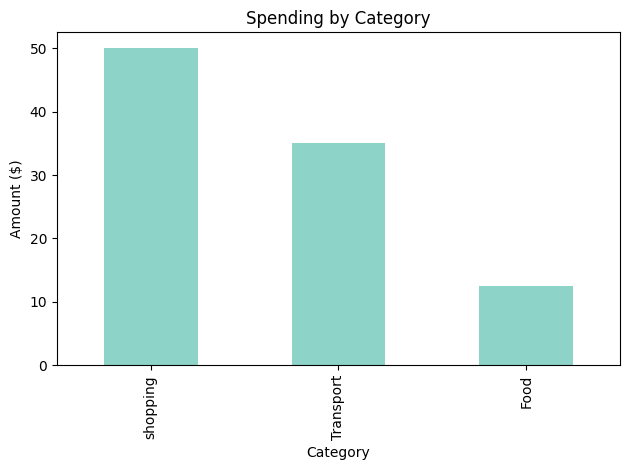


Spending Over Time:
Date
2025-04-15    97.5
Name: Amount, dtype: float64


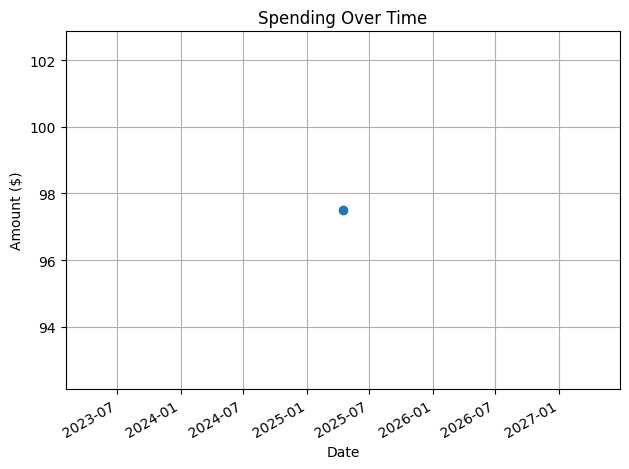

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os

FILE_NAME = 'expenses.csv'

def log_expense(amount, category, description=""):
    date = datetime.now().strftime('%Y-%m-%d')
    expense = pd.DataFrame([[date, amount, category, description]],
                           columns=['Date', 'Amount', 'Category', 'Description'])

    try:
        if os.path.exists(FILE_NAME):
            expense.to_csv(FILE_NAME, mode='a', header=False, index=False)
        else:
            expense.to_csv(FILE_NAME, index=False)
        print(f"Logged: ${amount:.2f} on {date} under '{category}'")
    except Exception as e:
        print(f"Error while logging expense: {e}")
def visualize_expenses():
    if not os.path.exists(FILE_NAME):
        print("No expenses logged yet!")
        return

    try:
        df = pd.read_csv(FILE_NAME)
        df['Date'] = pd.to_datetime(df['Date'])
        print("Loaded expenses:")
        print(df)
        category_totals = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
        print("\nSpending by Category:")
        print(category_totals)

        category_totals.plot(kind='bar', title='Spending by Category', colormap='Set3')
        plt.ylabel('Amount ($)')
        plt.tight_layout()
        plt.show()
        daily_totals = df.groupby('Date')['Amount'].sum()
        print("\nSpending Over Time:")
        print(daily_totals)

        daily_totals.plot(kind='line', marker='o', title='Spending Over Time', grid=True)
        plt.ylabel('Amount ($)')
        plt.xlabel('Date')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error while visualizing expenses: {e}")
print("Logging example expenses...")
log_expense(12.5, "Food", "Lunch")
log_expense(35.0, "Transport", "Gas refill")
log_expense(50.0,"shopping", "clothes")

print("\nVisualizing expenses...")
visualize_expenses()